# **Predicting Building Energy Use using Machine Learning**
#### *A Project by Mohammed Abdul Rehman and Prathamesh Bheemanathi*

# **INTRODUCTION**

Buildings energy consumption is put away around 40% of total energy use. In a building, this thermal energy involves two measures of cooling load (CL), and heating load (HL) and these measures are regulated by heating ventilation and air conditioning (HVAC) system. The HVAC system is designed to compute the HL and CL of the space and thereby, provide a desirable indoor air condition. The sum of these cooling and heating capacities gives us the total energy laod of the building. In this sense, some studies have focused on evaluating comfortable, yet energy-saving spaces. Required cooling and heating capacities are estimated mainly according to the basic factors, including building properties, its utilization, and climate conditions. 

In the same vein, with this project we aim to:

1. To study the effects of different physical design choices such as wall height and roof size on the predicted average energy use of a building in a given climate. 

2. To develop an efficient Machine Learning model that can predict the same given the values of the aforementioned design variables at a good accuracy

3. To deploy this Machine Learning on a web application.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **IMPLEMENTATION**

# A. Data Preparation

In this Notebook, we used the dataset taken from https://cml.ics.uci.edu/, based on research by Tsanas and Xifara.

In [2]:
data = pd.read_csv('Building Energy Efficiency.csv')

In [3]:
data['Total Load'] = data['Heating Load'] + data['Cooling Load']
data = data.drop(['Heating Load','Cooling Load'], axis=1)

# B. Data import

In [4]:
data.sample(frac = 1).head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Total Load
61,0.82,612.5,318.5,147.0,7.0,3,0.10,1,48.94
635,0.86,588.0,294.0,147.0,7.0,5,0.40,3,63.44
665,0.64,784.0,343.0,220.5,3.5,3,0.40,3,39.43
475,0.64,784.0,343.0,220.5,3.5,5,0.25,4,36.52
286,0.62,808.5,367.5,220.5,3.5,4,0.10,5,26.79


# Variable(s) Information:
Input variables are: 
+ Relative Compactness
+ Surface Area - m²
+ Wall Area - m²
+ Roof Area - m²
+ Overall Height - m
+ Orientation - 2:North, 3:East, 4:South, 5:West
+ Glazing Area - 0%, 10%, 25%, 40% (of floor area)
+ Glazing Area Distribution (Variance) - 1:Uniform, 2:North, 3:East, 4:South, 5:West

Output variables: 
+ Total Load - kWh

In [5]:
data.shape

(768, 9)

In [6]:
data.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Total Load                   0
dtype: int64

Since, there is no NaN data present in the dataset, no data-cleaning is required

Now, check the distribution of different variables.

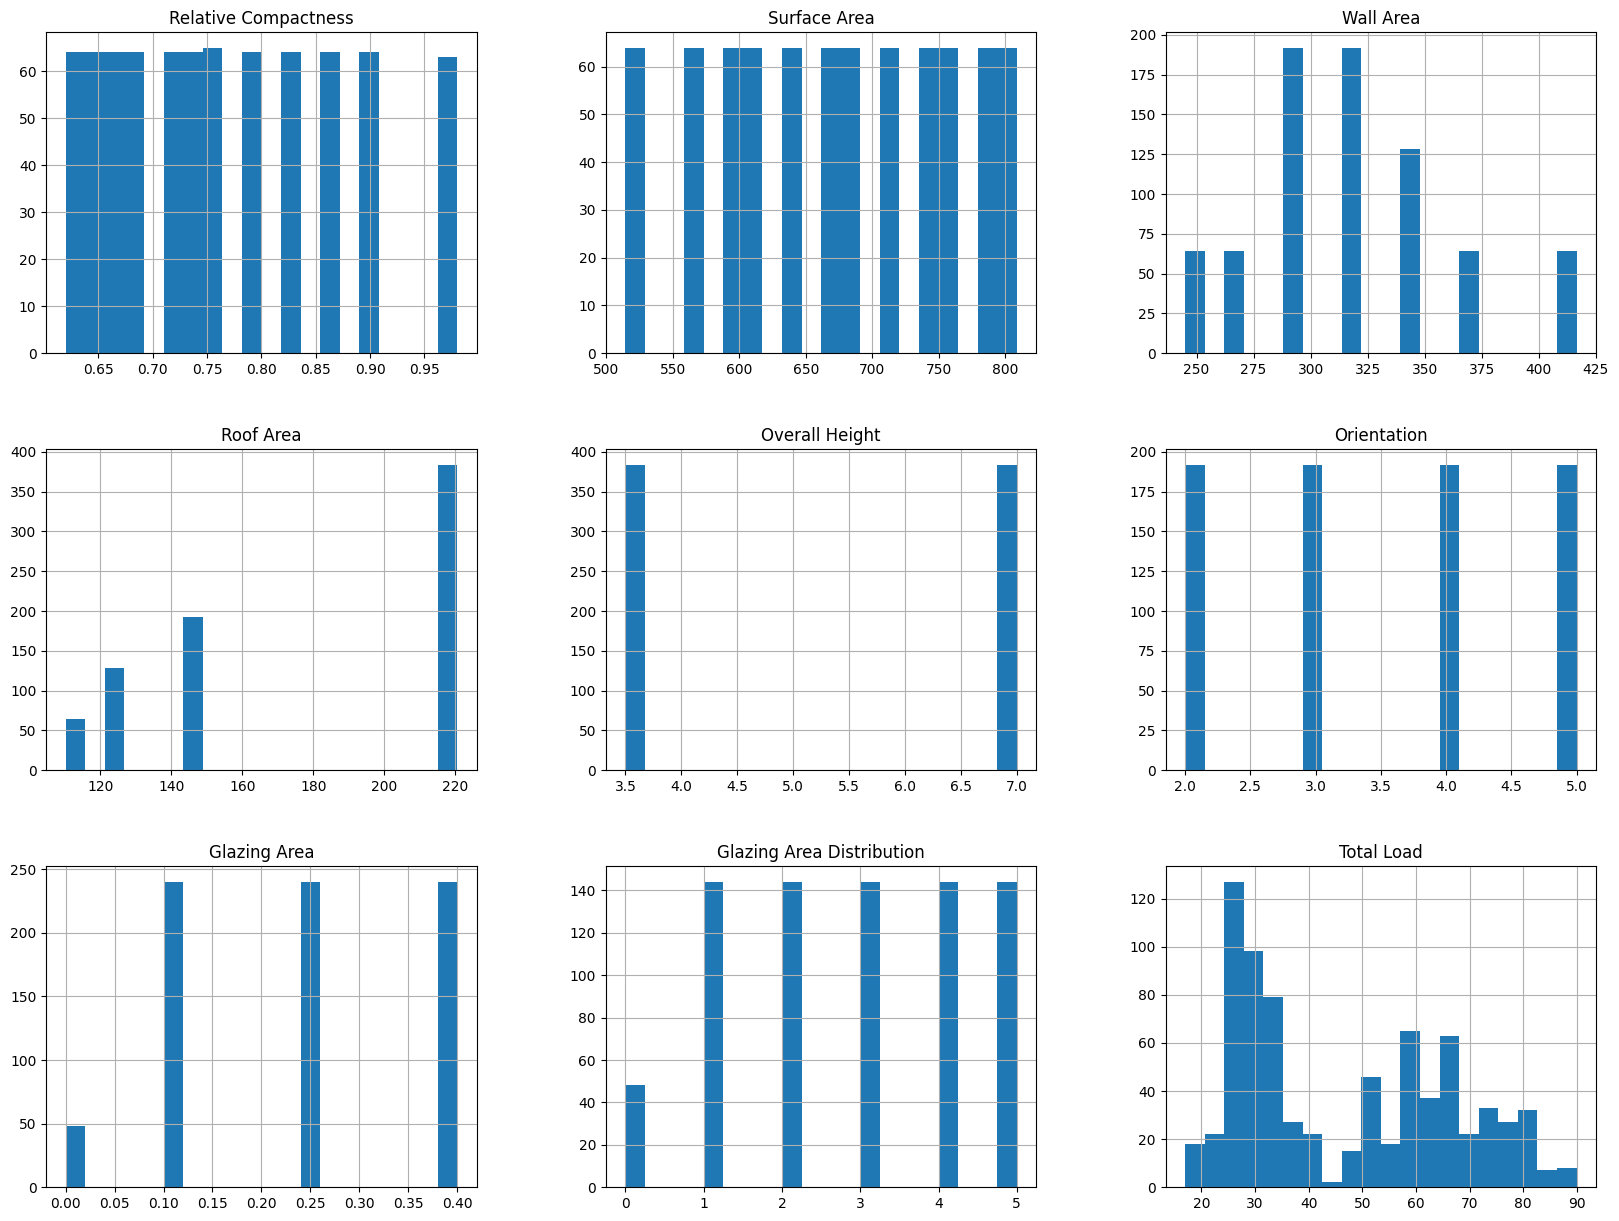

In [7]:
data.hist(bins=20, figsize=(20,15))
plt.show()

# C. Spliting the data in X and Y

Importing necessary Libraries ...

In [10]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

Set variables & target functions.

In [9]:
X = data[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
Y = data[['Total Load']]

Splitting the dataset into Training and Test set. Feature scaling or data normalization is a method used to normalize the range of independent variables or features of data. So when the values vary a lot in an independent variable, we use feature scaling so that all the values remain in the comparable range.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state = 20)

MinMax = MinMaxScaler(feature_range= (0,1))
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

# D. Fitting - modeling

Create a DataFrame to store computation results obtained with different models.

In [11]:
Acc = pd.DataFrame(index=None, columns=['model','cv_score', 'test_score'])

Now, let's try to select some Regressors that we have learnt in our ML lectures to check their performances.

In [12]:
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['GradientBoostingRegressor',GradientBoostingRegressor()]]

In [13]:
result_list = []

for mod in regressors:
    name = mod[0]
    model = mod[1]
    
    cv_score = cross_val_score(model, X_train, y_train).mean()

    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    result_list.append({'model': name, 'cv_score': cv_score, 'test_score': test_score})

Acc = pd.DataFrame(result_list)
Acc.sort_values(by='cv_score')

,model,cv_score,test_score
0,DecisionTreeRegressor,0.986755,0.987279
1,RandomForestRegressor,0.989769,0.991074
2,GradientBoostingRegressor,0.992319,0.995057


Wow, very impressive with the GradientBoostingRegressor.

# E. Models parameters tuning

Boosting machine learning algorithms are highly used because they give better accuracy over simple ones. Performance of these algorithms depends on hyperparameters. An optimal set of parameters can help to achieve higher accuracy. Finding hyperparameters manually is tedious and computationally expensive. Therefore, automation of hyperparameters tuning is important. RandomSearch, GridSearchCV, and Bayesian optimization are generally used to optimize hyperparameters.

In this Notebook, we calculate the best parameters for the model using “GridSearchCV”. Although it's a computationally expensive option, it guarantees us the best combination of hyperparameters. Here, we have shortened the search space for function, even then this is the most time-consuming part of this Notebook.

# Decision Tree Regressor parameters turning

Decision Tree algorithm has become one of the most used machine learning algorithm both in competitions like Kaggle as well as in business environment. Decision Tree can be used both in classification and regression problem. The model is based on decision rules extracted from the training data. In regression problem, the model uses the value instead of class and mean squared error is used to for a decision accuracy. 

# Parameters

+ max_features: The number of randomly chosen features from which to pick the best feature to split on a given tree node. It can be an integer or one of the two following methods (auto : square root of the total number of predictors. max : number of predictors.)
+ max_leaf_nodes: The maximum number of leaf nodes a tree in the forest can have, an integer between 1 and 1e9, inclusive.
+ max_depth: The maximum depth for growing each tree, an integer between 1 and 100, inclusive.
+ min_samples_leaf: The minimum number of samples each branch must have after splitting a node, an integer between 1 and 1e6, inclusive. A split that causes fewer remaining samples is discarded.

As observed in the fitting calculation section, we will try to tuning model parameters using the training data set of Cooling load (or y2_train). 

In [14]:
DTR = DecisionTreeRegressor()

param_grid = {"criterion": ["squared_error", "absolute_error"],"min_samples_split": [14, 15, 16, 17],
              "max_depth": [5, 6, 7],"min_samples_leaf": [4, 5, 6],"max_leaf_nodes": [29, 30, 31, 32],}

grid_cv_DTR = GridSearchCV(DTR, param_grid)

grid_cv_DTR.fit(X_train,y_train)

print("R-squared CV score::{}".format(grid_cv_DTR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_DTR.best_params_))

R-squared CV score::0.9871255711045894
Best Hyperparameters::
{'criterion': 'squared_error', 'max_depth': 7, 'max_leaf_nodes': 32, 'min_samples_leaf': 4, 'min_samples_split': 14}


In [15]:
DTR = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 7, max_leaf_nodes= 32, min_samples_leaf= 4, min_samples_split= 14)

print("R-squared CV score = {}".format(cross_val_score(DTR, X_train, y_train).mean()))

DTR.fit(X_train, y_train)
print("R-squared test score = {}".format(DTR.score(X_test,y_test)))

R-squared CV score = 0.9871255711045894
R-squared test score = 0.9891898690537428


Yes, the accuracy of the model has been improved.

# Tune Random Forests Parameters

Random forest is an ensemble tool which takes a subset of observations and a subset of variables to build a decision trees. It builds multiple such decision tree and amalgamate them together to get a more accurate and stable prediction. We generally see a random forest as a black box which takes in input and gives out predictions, without worrying too much about what calculations are going on the back end. This black box itself have a few levers we can play with. Each of these levers have some effect on either the performance of the model or the resource – time balance. Parameters in random forest are either to increase the predictive power of the model or to make it easier to train the model. 

There are primarily 3 features which can be tuned to improve the predictive power of the model :

+ Max_features: These are the maximum number of features Random Forest is allowed to try in individual tree. Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered. However, this is not necessarily true as this decreases the diversity of individual tree which is the USP of random forest. But, doing this is guaranteed to decrease the speed of algorithm by increasing the max_features. Hence, it's important to strike the right balance and choose the optimal max_features.

+ n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees gives better performance but makes the code slower. This value should be as high as your processor can handle because this makes the predictions stronger and more stable.

+ min_sample_leaf : Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data. 

There are a few attributes which have a direct impact on model training speed, one of these is the n_jobs parameter. This parameter tells the engine how many processors is it allowed to use. A value of “-1” means there is no restriction whereas a value of “1” means it can only use one processor.

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [350, 400, 450], 'max_features': [1, 2], 'max_depth': [85, 90, 95]}]

RFR = RandomForestRegressor(n_jobs=-1)
grid_search_RFR = GridSearchCV(RFR, param_grid)
grid_search_RFR.fit(X_train, y_train)

print("R-squared CV score = {}".format(grid_search_RFR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_RFR.best_params_))

R-squared CV score = 0.988751670692557
Best Hyperparameters::
{'max_depth': 95, 'max_features': 2, 'n_estimators': 350}


In [20]:
RFR = RandomForestRegressor(n_estimators = 350, max_features = 2, max_depth= 90, bootstrap= True)

RFR.fit(X_train,y_train)
print("R-squared CV score = {}".format(cross_val_score(RFR, X_train, y_train).mean()))
print("R-squared test score = {}".format(RFR.score(X_test,y_test)))

R-squared CV score = 0.9881409578788484
R-squared test score = 0.9919676081030694


As can be seen, there is only a slight improvement in accuracy

# Gradient Boosting Regression - Hyperparameter Tuning

What we will do now is make an instance of the GradientBoostingRegressor. We will create our grid with the various values for the hyperparameters. We will then take this grid and place it inside GridSearchCV function so that we can prepare to run our model. There are some arguments that need to be set inside the GridSearchCV function such as estimator, grid, cv, etc.

With this tuning we can see that the mean squared error is lower than with the baseline model. We can now move to the final step of taking these hyperparameter settings and see how they do on the dataset. There are several hyperparameters we need to tune, and they are as follows:

+ Learning rate: The learning rate is the weight that each tree has on the final prediction.
+ Number of estimators: The number of estimators is show many trees to create. The more trees the more likely to overfit.
+ Min samples split: The minimum number of samples required to split an internal node
+ Max depth: Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
+ Subsample: Subsample is the proportion of the sample to use.

In [18]:
param_grid = [{"learning_rate": [0.01, 0.02, 0.1], "n_estimators":[150, 200, 250], "max_depth": [4, 5, 6], 
 "min_samples_split":[1, 2, 3], "min_samples_leaf":[2, 3], "subsample":[1.0, 2.0]}]

GBR = GradientBoostingRegressor()
grid_search_GBR = GridSearchCV(GBR, param_grid)
grid_search_GBR.fit(X_train, y_train)

print("R-Squared CV score = {}".format(grid_search_GBR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_search_GBR.best_params_))

R-Squared CV score = 0.9953270042907099
Best Hyperparameters::
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 250, 'subsample': 1.0}


In [19]:
GBR = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250, max_depth=5, min_samples_split=3, min_samples_leaf=2, subsample=1.0)

GBR.fit(X_train,y_train)
print("R-squared CV score = {}".format(cross_val_score(GBR, X_train, y_train).mean()))
print("R-squared test score = {}".format(GBR.score(X_test,y_test)))

R-squared CV score = 0.9954410523432864
R-squared test score = 0.9982688325058499


This is a much better improvement in model performance than seen before

Now, it's time to summary all our BEST models

In [21]:
Acc = pd.DataFrame(index=None, columns=['model', 'cv_score', 'test_set_score'])

In [22]:
regressors1 = [['DecisionTreeRegressor',DecisionTreeRegressor(criterion= 'squared_error', max_depth= 7, max_leaf_nodes= 32, min_samples_leaf= 4, min_samples_split= 14)],
              ['RandomForestRegressor',RandomForestRegressor(n_estimators = 350, max_features = 2, max_depth= 90, bootstrap= True)],
              ['GradientBoostingRegressor',GradientBoostingRegressor(learning_rate=0.1,n_estimators=250, max_depth=5, min_samples_split=3, min_samples_leaf=2, subsample=1.0)]]

In [23]:
result_list = []
for mod in regressors:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y_train)
    cv_score = cross_val_score(model, X_train, y_train).mean()
    test_set_score = model.score(X_test, y_test)
    result_list.append({'model': name, 'cv_score': cv_score,'test_set_score': test_set_score})

Acc = pd.DataFrame(result_list)
Acc.sort_values(by='test_set_score')

,model,cv_score,test_set_score
0,DecisionTreeRegressor,0.982220,0.987286
1,RandomForestRegressor,0.989846,0.990900
2,GradientBoostingRegressor,0.991696,0.995057


# **IMPLEMENTATION RESULTS AND DISCUSSION**

In this Notebook, building energy performance has been investigated using different models to predict a building's total energy load.

We learnt how to tune different parameters in the models and obtained a very good prediction result (>99% on total load, compared to the experimental data set). Some observations will be shown in the graphs below.

In [24]:
model = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250, max_depth=5, min_samples_split=3, min_samples_leaf=2, subsample=1.0)

model.fit(X_train,y_train)
cv_score = cross_val_score(model, X_train, y_train).mean()
test_set_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)

In [25]:
print("GradientBoostingRegressor: CV score = {}".format(cv_score))
print("GradientBoostingRegressor: Test set score = {}".format(test_set_score))

GradientBoostingRegressor: CV score = 0.9955915368212281
GradientBoostingRegressor: Test set score = 0.9982651488864729


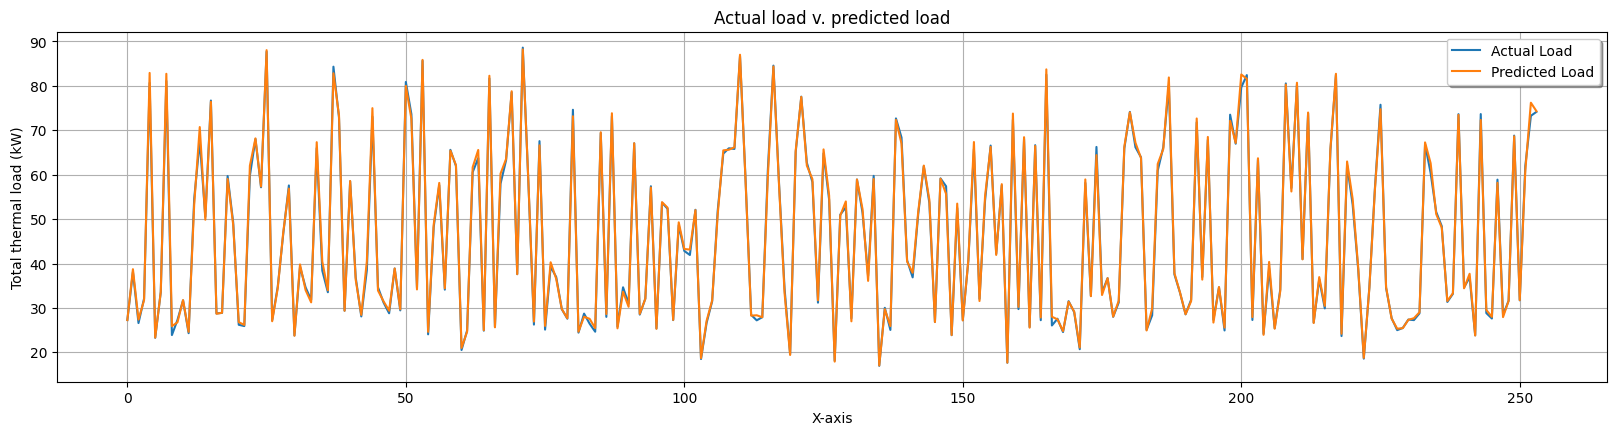

In [26]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(x_ax, y_test, label="Actual Load")
plt.plot(x_ax, y_pred, label="Predicted Load")
plt.title("Actual load v. predicted load")
plt.xlabel('X-axis')
plt.ylabel('Total thermal load (kW)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

plt.show()

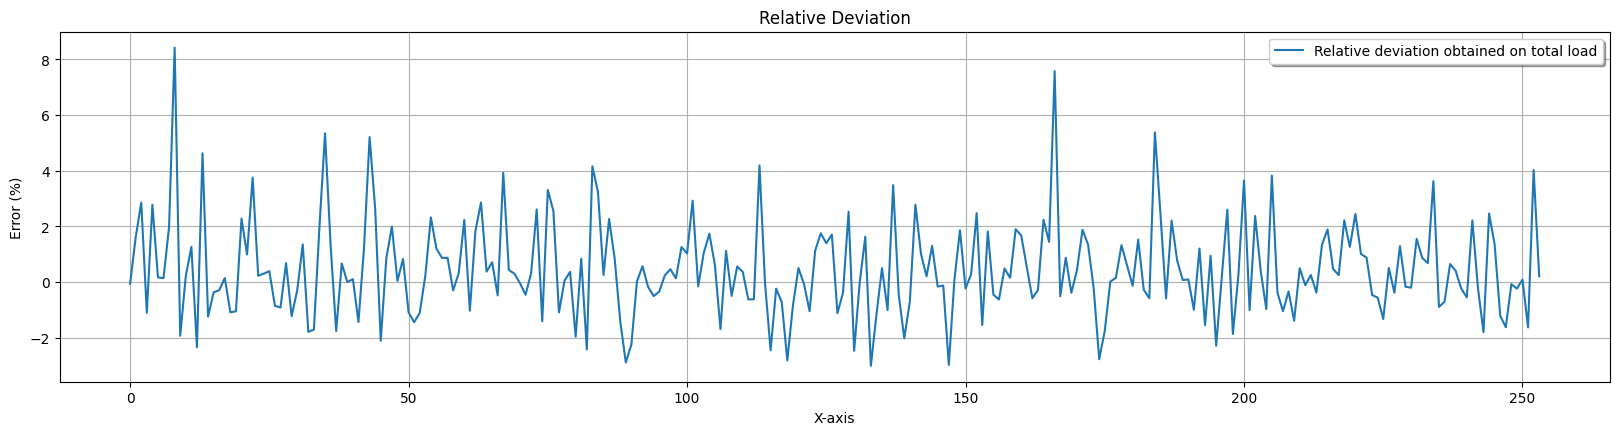

In [27]:
def AAD(y_test, y_pred):
    AAD =[]
    for i in range(len(y_pred)):
        AAD.append((y_pred[i] - y_test.values[i])/y_test.values[i]*100)
    return AAD

x_ax = range(len(y_test))
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(x_ax, AAD(y_test, y_pred), label="Relative deviation obtained on total load")
plt.title("Relative Deviation")
plt.xlabel('X-axis')
plt.ylabel('Error (%)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

plt.show()

Text(0.5, 1.0, 'Feature Importance')

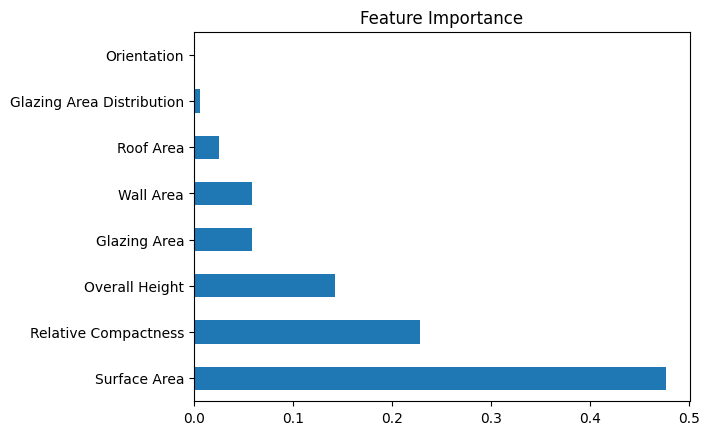

In [28]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature Importance")

In [29]:
import pickle
pickle.dump(model, open('singleloadmodel.pkl','wb'))

# **CONCLUSION**

In conclusion, this project has given us an opportunity apply machine learning to tackle real-world applications. In this project we have,

1.	Investigated the effect of the physical features on its average energy usage on an average day in a given climate. To this ended we have developed a Machine Learning model to predict this.

2.	Trained and tested a variety of models on our chosen dataset. And after a round of hyperparameter tuning we have developed a model that is able to predict the heating and cooling loads of a building with 99.5% accuracy.

3.	Deployed the machine learning model into a web application.

Moreover, this model solves a few of the issues that were seen in previous works, which were largely based on neural network algorithms, this includes issues such as,

1.	Lack of Interpretability

2.	Feature Importance Analysis

3.	Complexity

4.	Ease of Implementation
